# Verification of the Inverse Square Law Using Ionizing Radiation Data and Linear Regression

### Introduction
This analysis applies linear regression to verify the inverse square law through an ionizing radiation experiment. We will correct the observed radiation counts for background radiation, then use the linregress function from the scipy.stats module for a linear regression analysis of the inverse square of distances versus the corrected count rates.

### Setup
Ensure you have all necessary libraries ready. If you need to install them, uncomment the pip install commands.

In [1]:
# Install necessary packages (Uncomment if needed)
!pip install numpy scipy matplotlib

# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


### Data Preparation
We define our experiment data, including distances from the radiation source and the corresponding counts detected over a fixed duration. We'll correct these for background radiation to get accurate count rates.

In [2]:
# Ionizing radiation experiment data
distances_m = np.array([0.153, 0.135, 0.115, 0.095, 0.075, 0.055, 0.035])
counts_in_60s = np.array([3078, 4211, 4996, 6799, 10218, 15924, 32831])

# Background counts obtained from a separate part of the experiment
background_counts = 60

# Correcting for background radiation
background_rate = background_counts / 60  # Background count rate (counts/s)
count_rates = (counts_in_60s / 60) - background_rate

# Calculating inverse square of distances
inverse_square_distance = 1 / distances_m**2


### Performing Linear Regression
We apply linear regression to understand how the intensity of radiation (indicated by corrected count rates) varies with the inverse square of the distance from the source.

In [3]:
# Linear regression using linregress
slope, intercept, r_value, p_value, std_err = linregress(inverse_square_distance, count_rates)

# Displaying regression results
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Standard error of estimate: {std_err:.4f}")


Slope: 0.6312
Intercept: 39.7920
R-squared: 0.9948
p-value: 0.0000
Standard error of estimate: 0.0205


### Visualizing the Fit
A graphical representation helps in visualizing the relationship and the fit of the linear regression model to the data.

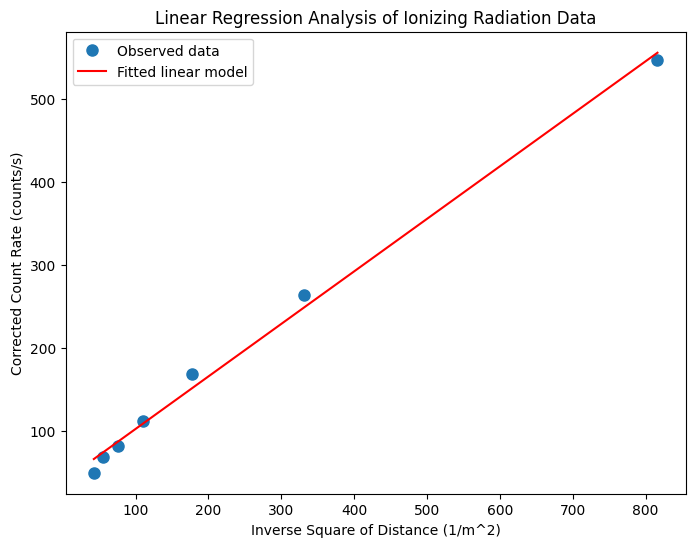

In [4]:
# Plotting the data and the linear regression model
plt.figure(figsize=(8, 6))
plt.plot(inverse_square_distance, count_rates, 'o', label='Observed data', markersize=8)
plt.plot(inverse_square_distance, intercept + slope * inverse_square_distance, 'r-', label='Fitted linear model')
plt.xlabel('Inverse Square of Distance (1/m^2)')
plt.ylabel('Corrected Count Rate (counts/s)')
plt.title('Linear Regression Analysis of Ionizing Radiation Data')
plt.legend()
plt.show()


### Understanding Linear Regression Under the Hood

Linear regression is not just about fitting a line through a set of data points—it's based on several key assumptions about the data:

1. **Linearity**: The relationship between the independent and dependent variable should be linear.
2. **Independence**: The residuals (errors) should be independent of each other.
3. **Homoscedasticity**: The residuals should have constant variance at all levels of the independent variable.
4. **Normality**: The residuals of the model should be normally distributed.

If we violate these assumptions it can lead to inaccuracies in the regression results.

The `linregress` function in `scipy.stats` performs simple linear regression by fitting a line to the data points. It uses the method of least squares to minimize the sum of the squares of the residuals—the differences between the observed values and the values predicted by the linear model.

The mathematical equation for a simple linear regression line is:

$$
y = \beta_0 + \beta_1x + \epsilon
$$

where:
- $y$ is the dependent variable,
- $x$ is the independent variable,
- $\beta_0$ is the intercept of the regression line with the y-axis,
- $\beta_1$ is the slope of the regression line, indicating the change in $y$ for a one-unit change in $x$,
- $\epsilon$ is the error term, representing the residual or unexplained variation in the dependent variable.

The slope $\beta_1$ is calculated as:

$$
\beta_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}
$$

The intercept $\beta_0$ is calculated using the formula:

$$
\beta_0 = \bar{y} - \beta_1\bar{x}
$$

where $\bar{x}$ and $\bar{y}$ are the mean values of the independent and dependent variables, respectively.

`linregress` returns the slope and intercept along with several statistical values, such as the $p$-value for a hypothesis test on the slope, the $r$-value (correlation coefficient), and the standard error of the estimate, which are essential for understanding the reliability and significance of the linear model.


### The Mathematics of Linear Regression
The simple linear regression model can be described by the equation $y = \beta_0 + \beta_1x + \epsilon$, where $y$ is the dependent variable, $x$ is the independent variable, $\beta_0$ is the y-intercept, $\beta_1$ is the slope of the line, and $\epsilon$ represents the error term. The `linregress` function estimates the best-fitting line through the data points by minimizing the sum of the squares of the vertical distances of the points from the line.


In [6]:
from scipy.stats import linregress, t

# Calculate standard error of the slope (SE of beta_1)
n = len(inverse_square_distance)  # Number of observations
x_mean = np.mean(inverse_square_distance)  # Mean of independent variable
y_pred = intercept + slope * inverse_square_distance  # Predicted values
sse = np.sum((count_rates - y_pred)**2)  # Sum of squared errors
sum_squared_deviation_x = np.sum((inverse_square_distance - x_mean)**2)
se_slope = np.sqrt(sse / ((n - 2) * sum_squared_deviation_x))

# Calculate the t-critical value for 95% confidence interval
alpha = 0.05  # Significance level for 95% confidence
t_critical = t.ppf(1 - alpha/2, df=n-2)  # t-critical value for 95% CI

# Calculate the margin of error for the slope
margin_error_slope = t_critical * se_slope

# Calculate the confidence intervals for the slope
ci_lower = slope - margin_error_slope
ci_upper = slope + margin_error_slope

# Output the standard error and confidence interval
print(f"Standard Error of the Slope: {se_slope}")
print(f"95% Confidence Interval for the Slope: ({ci_lower}, {ci_upper})")

Standard Error of the Slope: 0.02047118645317515
95% Confidence Interval for the Slope: (0.5785782574165298, 0.6838239775575014)
